## Homework Week 2: Neural Networks and Model Selection

### Loading Data

In this homework, you will train a neural network that will identify digits from handwritten images. For example, you might by a data scientist, tasked with extracting dates of birth from scanned forms to add to a database. You will use the MNIST dataset, a collection of 60,000 images of handwritten digits. This data set can be accessed using the `Keras` Python package, a package that provides tools for building and training neural networks. Run the code below to load this data from the cloud. The data is already divided into training and testing data sets. 

In [1]:
from keras.datasets import mnist
(train_X_3D, train_y), (test_X_3D, test_y) = mnist.load_data()

First, let's visualize one of these images. The downloaded data is organized as 3 dimensional arrays - a stack of matrices, with each matrix representing the pixels of a 28-by-28 pixel image. The values for each pixel range from 0 to 255, with 0 representing the darkest pixel (black) and 255 representing the brightest (white). **Run the code below to print one of the matrices, and then plot this matrix in greyscale.** 

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

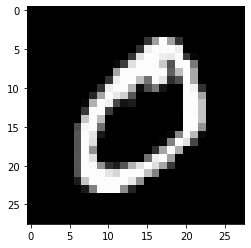

0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
#print matrix
print(train_X_3D[1,:,:])
#print image
plt.imshow(train_X_3D[1,:,:], cmap=plt.get_cmap('gray'))
plt.show()
#print y value (true value) 
print(train_y[1])

You can change the index to view a different image (now index 5), by running the cell below. Change the index to view any image you would like.

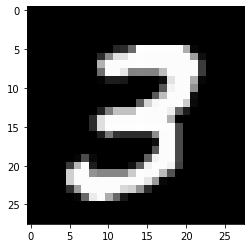

3


In [3]:
#set index
# image_index = 5 
image_index = 7 
#plot  image
plt.imshow(train_X_3D[image_index,:,:], cmap=plt.get_cmap('gray'))
plt.show()
#plot value
print(train_y[image_index])

In order to set up the data for training with `scikit-learn`, we will need to apply some simple 
transformations. The code below uses the `reshape` function to convert the data from a stack of matrices (each one an image, with each value representing a pixel) to a single matrix, where each row is a vector of all the pixels of a single image. By using the `.shape` method, we can check the dimensions of this matrix. 

In [4]:
import numpy as np
#transform image data to single matrix
trainging_inputs = [np.reshape(train_X_3D[i,:,:], ( 28*28)) for i in range(train_X_3D.shape[0]) ]
X_train = np.array(trainging_inputs)
#print matrix shape
X_train.shape

(60000, 784)

We can see that this reshaped data has 60000 rows, and 784 columns - one column for each of the $28 * 28$ pixels in the image.  

Now do the same for the testing data. Again using the `.shape` method, we can see that this data has 10000 rows, instead of 600000

In [5]:
#transform test data to single matrix
testing_inputs = [np.reshape(test_X_3D[i,:,:], ( 28*28)) for i in range(test_X_3D.shape[0]) ]
X_test = np.array(testing_inputs)
X_test.shape

(10000, 784)

Note that our $y$ vector is simply a vector of digit identifiers, with 60000 elements. 

In [6]:
#print yvector shape
train_y.shape

(60000,)

We can look at the first 10 digits of this vector by running the cell below. 

In [7]:
train_y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Classifying Binary Handwritten Digits using Neural Networks

We will start with just trying to classify ones versus zeros, a binary classifier like the one we saw in lecture. We'll see that our approach in the binary case extends very easily to all 10 digits. Run the code in the cell below, which selects only the data points with digit values equal to zero or one. 

In [8]:
#get rows where digit is one or zero as True, others as False
rows_0_1_train =(train_y==0) | (train_y== 1)
rows_0_1_test =(test_y==0) | (test_y== 1)

#use this to select only rows with ones and zeros
train_y_binary = train_y[rows_0_1_train]
test_y_binary = test_y[rows_0_1_test]
X_train_binary = X_train[rows_0_1_train]
X_test_binary = X_test[rows_0_1_test]


Now, let us train a neural network on this data using `scikit-learn`. The code below is taken directly from the neural network classification example in the lecture notebook, with a regularization parameter $\alpha$ of 0.0, 2 hidden layers with 3 and 2 neurons, respectively. **Modify the a neural network code below to have two hidden layers with 7 and 6 neurons (in that order), instead of 3 followed by 2 layers. Then, run the cell to train the neural network (this may take a few minutes)** 

In [9]:
#train neural network
from sklearn.neural_network import MLPClassifier

NN_model_classify = MLPClassifier( alpha= 0.0,
                     hidden_layer_sizes=(7,6), activation='logistic', max_iter=50,verbose=True, random_state=42)
                     # hidden_layer_sizes=(3,2), activation='logistic', max_iter=50,verbose=True, random_state=42)

NN_model_classify.fit(X_train_binary, train_y_binary)


Iteration 1, loss = 0.73063795
Iteration 2, loss = 0.63684589
Iteration 3, loss = 0.56217712
Iteration 4, loss = 0.49106295
Iteration 5, loss = 0.42243153
Iteration 6, loss = 0.35968646
Iteration 7, loss = 0.30424332
Iteration 8, loss = 0.25798087
Iteration 9, loss = 0.22007493
Iteration 10, loss = 0.18868615
Iteration 11, loss = 0.16349496
Iteration 12, loss = 0.14284869
Iteration 13, loss = 0.12637927
Iteration 14, loss = 0.11234293
Iteration 15, loss = 0.09939115
Iteration 16, loss = 0.08925153
Iteration 17, loss = 0.08071435
Iteration 18, loss = 0.07342938
Iteration 19, loss = 0.06664992
Iteration 20, loss = 0.06161155
Iteration 21, loss = 0.05646180
Iteration 22, loss = 0.05187838
Iteration 23, loss = 0.04811267
Iteration 24, loss = 0.04479159
Iteration 25, loss = 0.04228977
Iteration 26, loss = 0.03927133
Iteration 27, loss = 0.03721620
Iteration 28, loss = 0.03546280
Iteration 29, loss = 0.03335216
Iteration 30, loss = 0.03109303
Iteration 31, loss = 0.02877902
Iteration 32, los

C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', alpha=0.0, hidden_layer_sizes=(7, 6),
              max_iter=50, random_state=42, verbose=True)

Let's look the performance of our trained classifier on the test set and see how well do we do. First, let's predict the digits in our test set and store these predictions in `y_pred`. Then, we will create a confusion matrix, just as in lecture. 

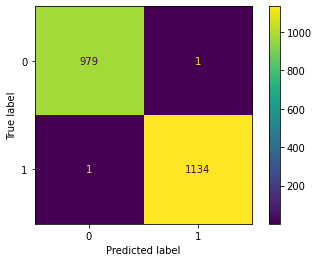

In [10]:
#make predictions on binary digits
y_pred_binary = NN_model_classify.predict(X_test_binary)

from sklearn.metrics import ConfusionMatrixDisplay
#plot confusion matrix
ConfusionMatrixDisplay.from_predictions(test_y_binary, y_pred_binary)


Our performance on classifying 1 versus 0 is extremely high. We can also see this by using the function `classification_report`, which reports our precision, recall, and f1-scores. 

In [11]:
from sklearn.metrics import classification_report

print(classification_report(test_y_binary, y_pred_binary))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      2115
   macro avg       1.00      1.00      1.00      2115
weighted avg       1.00      1.00      1.00      2115



### Classifying Digits 0-9 with Neural Networks

Now, we will extend our classifier to all 10 digits. We'll see that this is a very easy extension. Modify the neural network below to have three layers with 8, 9 and 4  neurons (in that order), and then fit the network

In [12]:
#train neural network
from sklearn.neural_network import MLPClassifier

NN_model_classify = MLPClassifier( alpha= 0.0,
                     hidden_layer_sizes=(8,9,4), activation='logistic', max_iter=50,verbose=True, random_state=42)
                     # hidden_layer_sizes=(5,4), activation='logistic', max_iter=50,verbose=True, random_state=42)

NN_model_classify.fit(X_train, train_y)

Iteration 1, loss = 2.28486106
Iteration 2, loss = 2.09198124
Iteration 3, loss = 1.92342541
Iteration 4, loss = 1.85231044
Iteration 5, loss = 1.79437773
Iteration 6, loss = 1.75360079
Iteration 7, loss = 1.71612429
Iteration 8, loss = 1.67375078
Iteration 9, loss = 1.63149528
Iteration 10, loss = 1.58997376
Iteration 11, loss = 1.55809497
Iteration 12, loss = 1.53198104
Iteration 13, loss = 1.49618318
Iteration 14, loss = 1.46728916
Iteration 15, loss = 1.44293917
Iteration 16, loss = 1.41076479
Iteration 17, loss = 1.38974437
Iteration 18, loss = 1.38135612
Iteration 19, loss = 1.33584993
Iteration 20, loss = 1.32496195
Iteration 21, loss = 1.29173297
Iteration 22, loss = 1.27913328
Iteration 23, loss = 1.26314593
Iteration 24, loss = 1.20776224
Iteration 25, loss = 1.17208271
Iteration 26, loss = 1.13205666
Iteration 27, loss = 1.12359315
Iteration 28, loss = 1.09977096
Iteration 29, loss = 1.09133524
Iteration 30, loss = 1.08309389
Iteration 31, loss = 1.07616612
Iteration 32, los

C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', alpha=0.0, hidden_layer_sizes=(8, 9, 4),
              max_iter=50, random_state=42, verbose=True)

Now, let's see how your trained neural network performed on the test set. First, we can try to classify an individual digit and see if it is classified successfully. The code below plots a handwritten digit, prints the true digits value, and then prints the predicted value.  

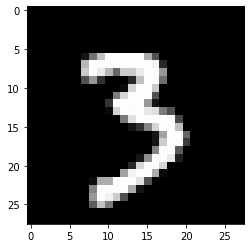

True digit: 3
Predicted digit: [3]


In [13]:
import matplotlib.pyplot as plt
#index = 50
index = 30

#plot handwritten digit
plt.imshow(test_X_3D[index,:,:], cmap=plt.get_cmap('gray'))
#print true digit value
plt.show()
print("True digit: %s" % test_y[index])
#print neural network
y_pred5 = NN_model_classify.predict(X_test[index:index+1,:])
print("Predicted digit: %s" % y_pred5)

Change the `index` above to view predictions for different digits. 

Now, let's make predictions on the test set, and view the precision, recall, and f1-scores for our model. This is almost the same as calculating precision, recall, and f1-scores for the binary case. The only difference is that for each digit, we compare predictions for the digit in question with predictions for predictions for all other digits, instead of just the single other digit. 

In [14]:
#make digit predictions on test set
y_pred = NN_model_classify.predict(X_test)
#print classification report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.94      0.80       980
           1       0.94      0.94      0.94      1135
           2       0.49      0.20      0.28      1032
           3       0.56      0.76      0.64      1010
           4       0.80      0.92      0.85       982
           5       0.00      0.00      0.00       892
           6       0.79      0.86      0.82       958
           7       0.87      0.89      0.88      1028
           8       0.45      0.79      0.57       974
           9       0.87      0.70      0.77      1009

    accuracy                           0.71     10000
   macro avg       0.65      0.70      0.66     10000
weighted avg       0.66      0.71      0.67     10000



C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Overall, we can see that the performance is relatively good across the board, though some digits appear to be easier to predict than others: compare the scores for the digit 1 to the digit 5. 

Print the confusion matrix for the predictions by running the cell below. With more than two classes, the confusion matrix is also quite conceptually similar to the binary case, it simply adds more cells for each new class (digit). The four squares in the top left corner are the same cells from the binary case confusion matrix. 

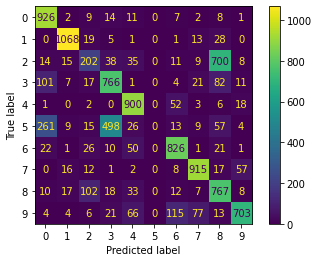

In [15]:
ConfusionMatrixDisplay.from_predictions(test_y, y_pred)

This is simply one configuration of the network. We may be able to improve our classification performance by changing the regularization parameter, the architecture (the number of layers and neurons per layer), or activation type. 

Let's use the cross-validation approach from lecture - training and testing on different parts of the test set and comparing the scores of different neural networks. The code below is very similar to the cross-validation code from lecture, but loops through multiple parameter values (alphas, layers, and activiation types), not just alphas, and compares prints their scores. 

Currently, the code compares two different layer configurations. Run the code and compare their scores. If you'd like, feel free to add additional alphas, layers, or activations to test.

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np


#define cross validatation function (and ignore convergence warnings)
@ignore_warnings(category=ConvergenceWarning)
def cross_validate_alpha(alphas,layers,activations,X_train,train_y):
  #for each alpha being tested, perform cross validation
  for alpha in alphas:
    for layer in layers:
      for activation in activations:    
        NN_model_classify = MLPClassifier( alpha=alpha,
                            hidden_layer_sizes=layer, activation=activation, max_iter=50, random_state=42)
        #apply cross validation to compute 4 scores (one for each held out portion of the training set)
        score = cross_val_score(NN_model_classify, X_train, train_y, cv=4)
        #report average score
        print("With alpha = %s, layers = %s, and activation =%s, average cross validation score of %s" % (alpha, str(layer), activation, np.mean(score)))

#Feel free to add addition values to any of these lists to test
#alphas = [0.0,]
alphas = [0.0,0.1,0.5,]
# layers = [(8,9,4 ),(7,6,7)]
layers = [(8,9,4),(7,6,7),(3,2),(5,4)]
# activations = ['logistic']
activations = ['logistic', 'relu']

cross_validate_alpha(alphas,layers,activations,X_train,train_y)

With alpha = 0.0, layers = (8, 9, 4), and activation =logistic, average cross validation score of 0.7605500000000001
With alpha = 0.0, layers = (8, 9, 4), and activation =relu, average cross validation score of 0.8220166666666666
With alpha = 0.0, layers = (7, 6, 7), and activation =logistic, average cross validation score of 0.7385333333333334
With alpha = 0.0, layers = (7, 6, 7), and activation =relu, average cross validation score of 0.7647
With alpha = 0.0, layers = (3, 2), and activation =logistic, average cross validation score of 0.5044500000000001
With alpha = 0.0, layers = (3, 2), and activation =relu, average cross validation score of 0.40215
With alpha = 0.0, layers = (5, 4), and activation =logistic, average cross validation score of 0.7909333333333333
With alpha = 0.0, layers = (5, 4), and activation =relu, average cross validation score of 0.7637499999999999
With alpha = 0.1, layers = (8, 9, 4), and activation =logistic, average cross validation score of 0.777300000000000

Now, we want to see how the best performing network performs on the test set. We'll retrain this network on the whole data set, and make predictions with the test data. **Modify the code below so that the alpha, the hidden layer sizes and the activations to be those of the best performing network from cross validation.**

In [17]:
# NN_model_classify = MLPClassifier( alpha= 0.0,
#                      hidden_layer_sizes=(5,4), activation='logistic', max_iter=50,verbose=True, random_state=42)
NN_model_classify = MLPClassifier( alpha= 0.5,
                     hidden_layer_sizes=(8,9,4), activation='relu', max_iter=50,verbose=True, random_state=42)

NN_model_classify.fit(X_train, train_y)

Iteration 1, loss = 2.91932854
Iteration 2, loss = 1.95075310
Iteration 3, loss = 1.72394820
Iteration 4, loss = 1.56483341
Iteration 5, loss = 1.40956633
Iteration 6, loss = 1.31208092
Iteration 7, loss = 1.24452462
Iteration 8, loss = 1.19712691
Iteration 9, loss = 1.15948967
Iteration 10, loss = 1.10923061
Iteration 11, loss = 1.05018935
Iteration 12, loss = 0.99939528
Iteration 13, loss = 0.95117830
Iteration 14, loss = 0.90579823
Iteration 15, loss = 0.86194584
Iteration 16, loss = 0.81723863
Iteration 17, loss = 0.77046886
Iteration 18, loss = 0.73346930
Iteration 19, loss = 0.71031927
Iteration 20, loss = 0.67423601
Iteration 21, loss = 0.63618358
Iteration 22, loss = 0.57983705
Iteration 23, loss = 0.50716906
Iteration 24, loss = 0.46268995
Iteration 25, loss = 0.43684753
Iteration 26, loss = 0.41901848
Iteration 27, loss = 0.40654024
Iteration 28, loss = 0.39740670
Iteration 29, loss = 0.38621864
Iteration 30, loss = 0.38020394
Iteration 31, loss = 0.37507668
Iteration 32, los

C:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.5, hidden_layer_sizes=(8, 9, 4), max_iter=50,
              random_state=42, verbose=True)

Now, make digit predictions on the test set, and visualize the performance with a confusion matrix by running the cell below.  

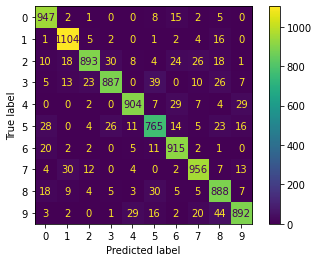

In [18]:
#make digit predictions on test set
y_pred = NN_model_classify.predict(X_test)
#print confusion matrix
ConfusionMatrixDisplay.from_predictions(test_y, y_pred)